In [21]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import torch.optim as optim
import torch.nn as nn
import torch.utils.data as data_utils
import torchviz


In [22]:
my_dataframe = pd.read_csv('data.csv')

In [23]:
my_dataframe.columns

Index(['x', 'y'], dtype='object')

In [24]:
xs = my_dataframe['x']
ys = my_dataframe['y']

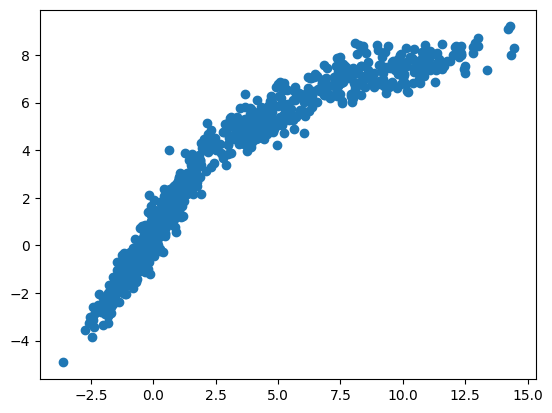

In [25]:
plt.scatter(xs, ys)

In [26]:
xs_n = (xs-xs.mean())/xs.std()
ys_n = (ys-ys.mean())/ys.std()

xs_t = torch.tensor(xs_n)
ys_t = torch.tensor(ys_n)

my_data_set =  data_utils.TensorDataset(xs_t, ys_t)

my_data_loader = data_utils.DataLoader(my_data_set, 1000, True)




class MyLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        a = torch.randn(1, requires_grad=True)
        self.a = nn.Parameter(a)
        b = torch.randn(1, requires_grad=True)
        self.b = nn.Parameter(b)
        c = torch.randn(1, requires_grad=True)
        self.c = nn.Parameter(c)
    
    def forward(self,x):
        return (self.a*x*x)+(self.b*x)+self.c
    


my_model = MyLinearModel()
optimizer =  optim.SGD(my_model.parameters(), 0.01)
loss_fn = nn.MSELoss()

n_steps = 1000

for step in range(n_steps):
    for batch_x,batch_y in my_data_loader:
        ys_pred = my_model(batch_x)
        loss = loss_fn(ys_pred, batch_y)
        loss.backward()
    
    optimizer.step()
    optimizer.zero_grad()




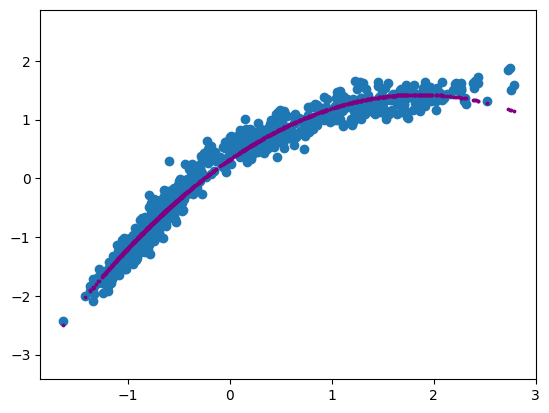

Parameter containing:
tensor([-0.3218], requires_grad=True) Parameter containing:
tensor([1.1941], requires_grad=True) Parameter containing:
tensor([0.3209], requires_grad=True)
900 900


In [27]:
plt.scatter(xs_n, ys_n)
# plt.plot(xs_t.detach(), my_model(xs_t).detach(), 'g-')
x_plot = xs_t
y_plot = my_model(xs_t).detach()
plt.scatter(x_plot, y_plot, 3, c='purple')
plt.ylim(min(ys_n)-1, max(ys_n)+1)
plt.show()
print(my_model.a, my_model.b,my_model.c)
print(len(x_plot), len(y_plot))

In [28]:
xs_n = (xs-xs.mean())/xs.std()
ys_n = (ys-ys.mean())/ys.std()

xs_t = torch.tensor(xs_n, dtype=torch.float32).reshape(-1,1)
ys_t = torch.tensor(ys_n, dtype=torch.float32).reshape(-1,1)

my_data_set =  data_utils.TensorDataset(xs_t, ys_t)

my_data_loader = data_utils.DataLoader(my_data_set, 10000, True)




class MyLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(1, 50)
        self.layer2 = nn.Linear(50, 1)
        self.relu = nn.ReLU()
    
    def forward(self,x):
        x = x.reshape(-1, 1)
        l = self.layer1(x)
        l_act = self.relu(l)
        y = self.layer2(l_act)
        return y
    


my_model = MyLinearModel()
optimizer =  optim.SGD(my_model.parameters(), 0.04)
loss_fn = nn.MSELoss()

n_steps = 2000

for step in range(n_steps):
    for batch_x,batch_y in my_data_loader:
        optimizer.zero_grad()
        ys_pred = my_model(batch_x)
        loss = loss_fn(ys_pred, batch_y)
        loss.backward()
        optimizer.step()
    
    




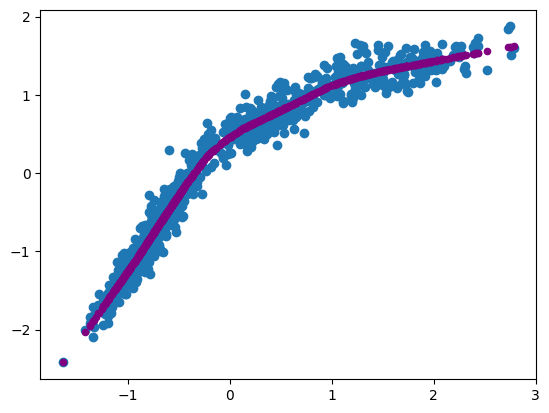

Linear(in_features=1, out_features=50, bias=True) Linear(in_features=50, out_features=1, bias=True)
900 900


In [29]:
plt.scatter(xs_n, ys_n)
# plt.plot(xs_t.detach(), my_model(xs_t).detach(), 'g-')
x_plot = xs_t
y_plot = my_model(xs_t).detach()
plt.scatter(x_plot, y_plot, 20, c='purple')
# plt.ylim(min(ys_n)-1, max(ys_n)+1)
plt.show()
print(my_model.layer1, my_model.layer2)
print(len(x_plot), len(y_plot))

In [30]:
xs_n = (xs-xs.mean())/xs.std()
ys_n = (ys-ys.mean())/ys.std()

xs_t = torch.tensor(xs_n, dtype=torch.float32).reshape(-1,1)
ys_t = torch.tensor(ys_n, dtype=torch.float32).reshape(-1,1)

my_data_set =  data_utils.TensorDataset(xs_t, ys_t)

my_data_loader = data_utils.DataLoader(my_data_set, 100000, True)




class MyLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(1, 100)
        self.layer2 = nn.Linear(100, 1)
        self.relu = nn.ReLU()
    
    def forward(self,x):
        x = x.reshape(-1, 1)
        l = self.layer1(x)
        l_act = self.relu(l)
        y = self.layer2(l_act)
        return y
    


my_model = MyLinearModel()
optimizer =  optim.SGD(my_model.parameters(), 0.01)
loss_fn = nn.MSELoss()

n_steps = 5000

for step in range(n_steps):
    for batch_x,batch_y in my_data_loader:
        optimizer.zero_grad()
        ys_pred = my_model(batch_x)
        loss = loss_fn(ys_pred, batch_y)
        loss.backward()
        optimizer.step()
    
    



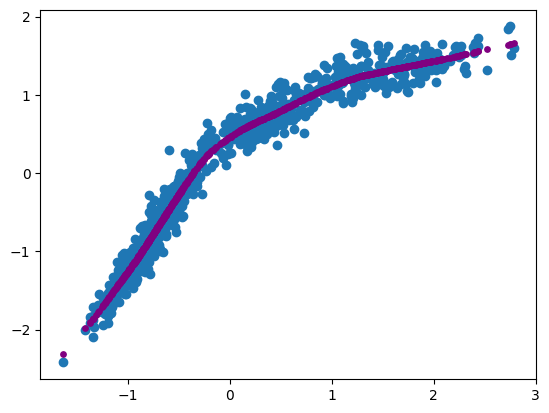

Linear(in_features=1, out_features=100, bias=True) Linear(in_features=100, out_features=1, bias=True)
900 900


In [31]:
plt.scatter(xs_n, ys_n)
# plt.plot(xs_t.detach(), my_model(xs_t).detach(), 'g-')
x_plot = xs_t
y_plot = my_model(xs_t).detach()
plt.scatter(x_plot, y_plot, 15, c='purple')
# plt.ylim(min(ys_n)-1, max(ys_n)+1)
plt.show()
print(my_model.layer1, my_model.layer2)
print(len(x_plot), len(y_plot))